### Iterative regularisation    

Simple Landweber Iteration scheme illustrated on deconvolution problem.

In [132]:
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [133]:
#forward mapping for convolution
def create_fmap_con(n=4,d=1):
    weights = np.zeros(d)
    weights[0:n] = 1./n
    A = np.zeros([d,d])
    for i in range(0,d):
        A[i,:] = np.roll(weights,i-int(n/2))
    return A

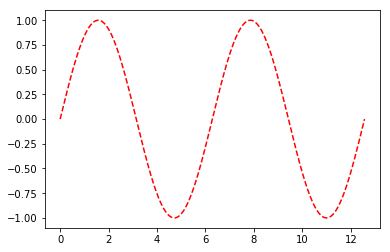

In [134]:
t = np.linspace(0,4*np.pi,1000)
x = np.sin(t)
plt.plot(t,x,'r--')
plt.show()

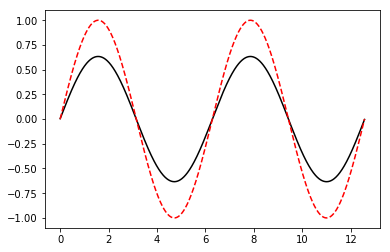

In [135]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/4+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

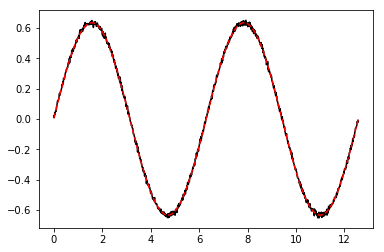

In [153]:
#add almost undetectable noise
#y_noisy = y+np.random.normal(0,0.001,size=len(y))
y_noisy = y+np.random.normal(0,0.01,size=len(y))
plt.plot(t,y_noisy,'k')
plt.plot(t,y,'r--')
plt.show()

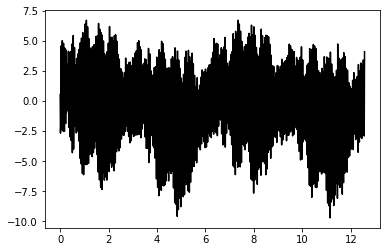

In [137]:
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y_noisy),'k')
plt.show()

#### Iterative approach

In [154]:
from scipy.sparse.linalg import svds

In [155]:
U, s, VT = svds(A, k=1)
s1 = s
print(s1)

[ 1.]


In [156]:
niter = 1000
xs = np.zeros((niter,len(x)))
for i in range(0,niter-1):
    #update rule
    xs[i+1,:] = xs[i,:] + A.T@(y_noisy-A@xs[i,:])

In [157]:
niter = 1000
xs = np.zeros((niter,len(x)))
x_norms = np.zeros(niter)
data_norms = np.zeros(niter)
for i in range(0,niter-1):
    
    #calc norms
    x_norms[i] = np.linalg.norm(xs[i,:],2)
    #x_norms_1[i] = np.linalg.norm(xs[i,:],1)
    data_norms[i] = np.linalg.norm(y_noisy - np.dot(A,xs[i,:]))
    
    #update rule
    xs[i+1,:] = xs[i,:] + A.T@(y_noisy-A@xs[i,:])

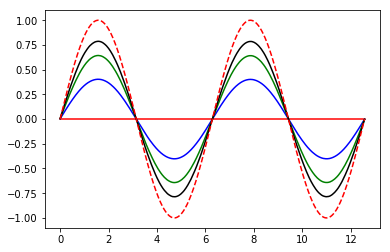

In [158]:
plt.plot(t,xs[0,:],'r')
plt.plot(t,xs[1,:],'b')
plt.plot(t,xs[2,:],'g')
plt.plot(t,xs[3,:],'k')
plt.plot(t,x,'r--')
plt.show()

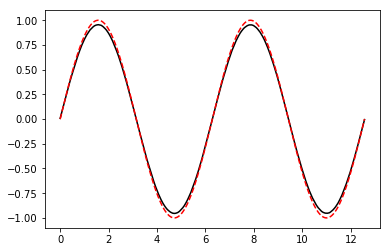

In [159]:
plt.plot(t,xs[6,:],'k')
plt.plot(t,x,'r--')
plt.show()

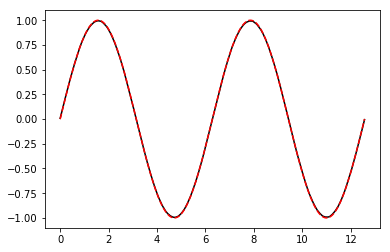

In [160]:
plt.plot(t,xs[10,:],'k')
plt.plot(t,x,'r--')
plt.show()

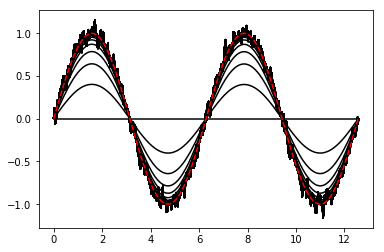

In [161]:
plt.plot(t,xs.T,'k')
plt.plot(t,x,'r--')
plt.show()

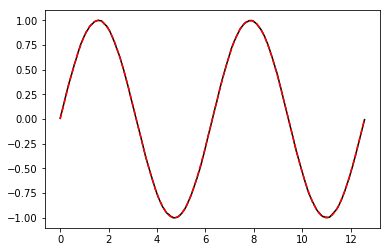

In [162]:
plt.plot(t,xs[29,:],'k')
plt.plot(t,x,'r--')
plt.show()

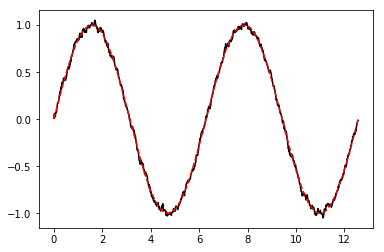

In [163]:
plt.plot(t,xs[299,:],'k')
plt.plot(t,x,'r--')
plt.show()

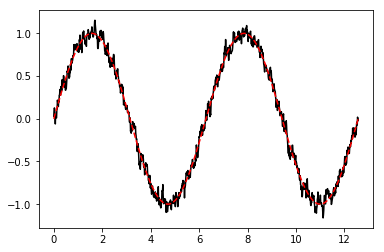

In [164]:
plt.plot(t,xs[999,:],'k')
plt.plot(t,x,'r--')
plt.show()

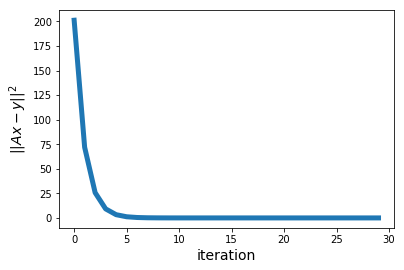

In [165]:
n = 30
plt.plot(data_norms[0:n]**2,linewidth=5)
plt.ylabel(r'$||Ax-y||^2$',fontsize=14)
plt.xlabel(r'iteration',fontsize=14)
plt.show()

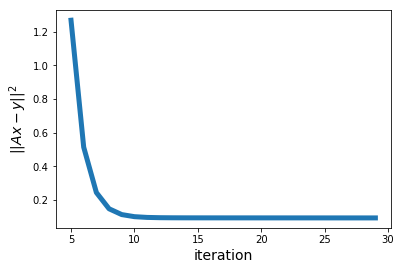

In [166]:
n = 30
plt.plot(np.arange(5,n),data_norms[5:n]**2,linewidth=5)
plt.ylabel(r'$||Ax-y||^2$',fontsize=14)
plt.xlabel(r'iteration',fontsize=14)
plt.show()

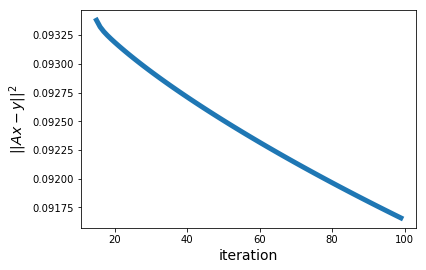

In [167]:
#n = 30
n = 100
plt.plot(np.arange(15,n),data_norms[15:n]**2,linewidth=5)
plt.ylabel(r'$||Ax-y||^2$',fontsize=14)
plt.xlabel(r'iteration',fontsize=14)
plt.show()

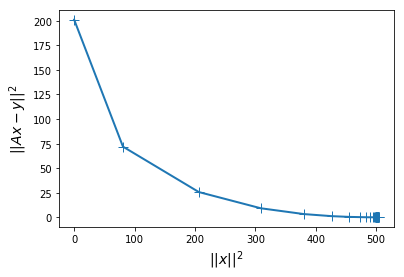

In [170]:
n = 999
plt.plot(x_norms[0:n]**2,data_norms[0:n]**2,'-+',markersize=10,linewidth=2)
plt.ylabel(r'$||Ax-y||^2$',fontsize=14)
plt.xlabel(r'$||x||^2$',fontsize=14)
plt.show()